In [3]:
##Exploring Traveler data
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline 
train_file="C:\\Users\\hp\\Desktop\\DMALab-master\\Project\\deaths-in-india-satp-dfe.csv"

data = pd.read_csv(train_file, header = 0,index_col=None)

Populating the interactive namespace from numpy and matplotlib


In [4]:
#Droppig _golden attribute as it is containing same values for every touple
data.drop('_golden', axis = 1, inplace = True)
print("Dropping _golden")

#Droppig unitstate attribute as it is containing same values for every touple
data.drop('_unit_state',axis = 1, inplace = True)
print("Dropping _unit_state")

#Droppig accuracy attribute as it is containing same values for every touple
data.drop('accuracy',axis = 1, inplace = True)
print("Dropping accuracy")

#Droppig civilians_gold attribute as it is not containing any values 
data.drop('civilians_gold',axis = 1, inplace = True)
print("Dropping civilians_gold")

#Droppig militants_terrorists_insurgents_gold attribute as it is not containing any values 
data.drop('militants_terrorists_insurgents_gold',axis = 1, inplace = True)
print("Dropping militants_terrorists_insurgents_gold")

#Droppig object attribute as it is redundant attribute in the dataset
data.drop('object',axis = 1, inplace = True)
print("Dropping object")

#Droppig security_forces_gold attribute as it is not containing any values 
data.drop('security_forces_gold',axis = 1, inplace = True)
print("Dropping security_forces_gold")

#Droppig sid attribute as it is not going to helpful our prediction of terorsist attacks
data.drop('sid',axis = 1, inplace = True)
print("Dropping sid")

#Droppig srid attribute as it is not going to helpful our prediction of terorsist attacks
data.drop('srid',axis = 1, inplace = True)
print("Dropping srid")

#Droppig state attribute as it is not going to helpful our prediction of terorsist attacks
data.drop('state',axis = 1, inplace = True)
print("Dropping state")

#Droppig svmlabel2 attribute as it is not going to helpful our prediction of terorsist attacks
data.drop('svmlabel2',axis = 1, inplace = True)
print("Dropping svmlabel2")

#Droppig svmlabel2prob attribute as it is not helpful our prediction of terorsist attacks
data.drop('svmlabel2prob',axis = 1, inplace = True)
print("Dropping svmlabel2prob")

#Droppig svmobjecttypelab attribute as it is containing same values for every touple
data.drop('svmobjecttypelab',axis = 1, inplace = True)
print("Dropping svmobjecttypelab")

#Droppig svmobjecttypeprob attribute as its dependency attribute is being removed
data.drop('svmobjecttypeprob',axis = 1, inplace = True)
print("Dropping svmobjecttypeprob")

data.drop('total_number_of_people_gold',axis = 1, inplace = True)
print("Dropping total_number_of_people_gold")

data.drop('date',axis = 1, inplace = True)
print("Dropping date")

Dropping _golden
Dropping _unit_state
Dropping accuracy
Dropping civilians_gold
Dropping militants_terrorists_insurgents_gold
Dropping object
Dropping security_forces_gold
Dropping sid
Dropping srid
Dropping state
Dropping svmlabel2
Dropping svmlabel2prob
Dropping svmobjecttypelab
Dropping svmobjecttypeprob
Dropping total_number_of_people_gold
Dropping date


In [5]:
date=data['report_date']
import re
#print (date.dtype)
import datetime

for var in date:
    if(re.search("/",str(var))):
        var1=re.sub('/','-',str(var))
        var2=datetime.datetime.strptime(var1, '%m-%d-%y').date()
        data['report_date'].replace(var,var2,inplace=True)
    else:
        if(re.match("[0-9]{4}-[0-9]{2}-[0-9]{2}",str(var))):
            var=var
        else:
            var2=datetime.datetime.strptime(str(var), '%m-%d-%Y').strftime("%Y-%m-%d")
            data['report_date'].replace(var,var2,inplace=True)
        
        
     


In [6]:
#converting into Standard date format Y-M-D
data['report_date'] = pd.to_datetime(data['report_date'], format='%Y-%m-%d')


In [7]:
date2=data['_last_judgment_at']
import re
import datetime

for var in date2:
    if(re.search("/",str(var))):
        var1=re.sub('/','-',str(var))
        var1=var1[0:7]
        var2=datetime.datetime.strptime(var1, '%m-%d-%y').date()
        data['_last_judgment_at'].replace(var,var2,inplace=True)
    else:
        if(re.match("[0-9]{4}-[0-9]{2}-[0-9]{2}",str(var))):
            var1=var
        else:
            var2=datetime.datetime.strptime(str(var)[0:10], '%m-%d-%Y').strftime("%Y-%m-%d")
            data['_last_judgment_at'].replace(var,var2,inplace=True)
        
        
     

In [8]:
#converting into Standard date format Y-M-D
data['_last_judgment_at'] = pd.to_datetime(data['_last_judgment_at'], format='%Y-%m-%d')


In [9]:
# Fill state_full column
print("Filling state_full column...")
data['state_full'].fillna('NA', inplace=True)
print("Filling state_full column...completed")

Filling state_full column...
Filling state_full column...completed


In [10]:
def convert_to_binary(df, column_to_convert):
    categories = list(df[column_to_convert].drop_duplicates())

    for category in categories:
        cat_name = str(category).replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_").replace("-", "").lower()
        col_name = column_to_convert[:4] + '_' + cat_name[:10]
        df[col_name] = 0
        df.loc[(df[column_to_convert] == category), col_name] = 1

    return df

# One Hot Encoding
print("One Hot Encoding categorical data...")
columns_to_convert = ['state_full','svmlabel1']

for column in columns_to_convert:
    data = convert_to_binary(data,column)
    data.drop(column, axis=1, inplace=True)
print("One Hot Encoding categorical data...completed")

One Hot Encoding categorical data...
One Hot Encoding categorical data...completed


In [11]:
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,27223,27224,27225,27226,27227,27228,27229,27230,27231,27232
_unit_id,711601341,711601342,711601343,711601344,711601345,711601346,711601347,711601348,711601349,711601350,...,712482413,712482423,712482442,712482447,712482461,712482465,712482476,712482485,712482493,712482497
_trusted_judgments,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
_last_judgment_at,2015-04-30 00:00:00,2015-04-30 00:00:00,2015-04-30 00:00:00,2015-04-30 00:00:00,2015-04-30 00:00:00,2015-04-30 00:00:00,2015-04-30 00:00:00,2015-04-30 00:00:00,2015-04-30 00:00:00,2015-04-30 00:00:00,...,2015-05-05 00:00:00,2015-05-04 00:00:00,2015-05-05 00:00:00,2015-05-06 00:00:00,2015-05-06 00:00:00,2015-05-05 00:00:00,2015-05-05 00:00:00,2015-05-05 00:00:00,2015-05-05 00:00:00,2015-05-06 00:00:00
civilians,0,0,0,NaN,0,0,0,1,0,3,...,0,0,0,NaN,0,0,0,0,0,0
militants_terrorists_insurgents,3,7,1,7,2,1,0,0,3,0,...,3,1,3,NaN,2,4,1,1,1,1
security_forces,1,0,0,NaN,0,0,1,0,0,0,...,0,0,0,2,0,0,0,0,0,0
total_number_of_people,4,7,1,7,2,1,1,1,3,3,...,3,1,3,2,2,4,1,1,1,1
canddist,NaN,Baramulla,NaN,Kamrup,Karimnagar,Tinsukia,Churachandpur,NaN,NaN,Sibsagar,...,Imphal West,Dibrugarh,Palamu,NaN,NaN,West Singhbhum,Patna,Sundargarh,Ganderbal,Latehar
districtmatch,srinagar,baramulla,calcutta,kamrup,karimnagar,tinsukia,churachandpur,srinagar,jorhat,sibsagar,...,imphal west,dibrugarh,palamu,jammu,kulgam,west singhbhum,patna,sundargarh,ganderbal,latehar
eventid,3,4,13,15,41,46,52,56,123,124,...,94258,141700,247876,327015,60782,316428,40669,264303,225666,206819


In [12]:
#to find total number of deaths based on profession 
security=data['svml_security'].sum()

terrorist=data['svml_terrorist'].sum()

civilian=data['svml_civilian'].sum()

public=data['svml_public'].sum()

private=data['svml_private'].sum()


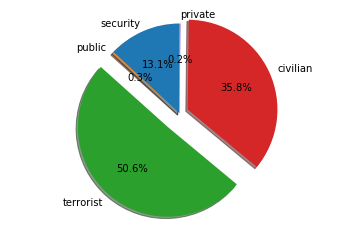

In [13]:
# Pie chart
labels = 'security','public', 'terrorist', 'civilian' ,'private'
sizes = [security,public,terrorist,civilian,private]
explode = (0, 0, 0.2, 0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode =explode ,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [14]:
# Fill civilians column
print("Filling civilians column...")
data['civilians'].fillna(-1, inplace=True)
print("Filling civilians column...completed")

Filling civilians column...
Filling civilians column...completed


In [15]:
# Fill militants_terrorists_insurgents column
print("Filling militants_terrorists_insurgents column...")
data['militants_terrorists_insurgents'].fillna(-1, inplace=True)
print("Filling militants_terrorists_insurgents column...completed")

Filling militants_terrorists_insurgents column...
Filling militants_terrorists_insurgents column...completed


In [16]:
# Fill security_forces column
print("Filling security_forces column...")
data['security_forces'].fillna(-1, inplace=True)
print("Filling security_forces column...completed")

Filling security_forces column...
Filling security_forces column...completed


In [19]:
# Fill Subject column
print("Filling subject column...")
data['subject'].fillna('unknown', inplace=True)
print("Filling Subject column...completed")

Filling subject column...
Filling Subject column...completed
